<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 1</a></span><ul class="toc-item"><li><span><a href="#Exercise-1-a)" data-toc-modified-id="Exercise-1-a)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise 1 a)</a></span></li><li><span><a href="#Exercise-1-b)" data-toc-modified-id="Exercise-1-b)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercise 1 b)</a></span></li></ul></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 2</a></span><ul class="toc-item"><li><span><a href="#Exercise-2-a)" data-toc-modified-id="Exercise-2-a)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise 2 a)</a></span></li><li><span><a href="#Exercise-2-b)" data-toc-modified-id="Exercise-2-b)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercise 2 b)</a></span></li></ul></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 3</a></span></li><li><span><a href="#Exercise-4" data-toc-modified-id="Exercise-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 4</a></span><ul class="toc-item"><li><span><a href="#Exercise-4-a)" data-toc-modified-id="Exercise-4-a)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise 4 a)</a></span></li><li><span><a href="#Exercise-4-b)" data-toc-modified-id="Exercise-4-b)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercise 4 b)</a></span></li><li><span><a href="#Exercise-4-c)" data-toc-modified-id="Exercise-4-c)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exercise 4 c)</a></span></li><li><span><a href="#Exercise-4-d)" data-toc-modified-id="Exercise-4-d)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Exercise 4 d)</a></span></li></ul></li><li><span><a href="#Exercise-5" data-toc-modified-id="Exercise-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 5</a></span><ul class="toc-item"><li><span><a href="#Exercise-5-a)" data-toc-modified-id="Exercise-5-a)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exercise 5 a)</a></span></li><li><span><a href="#Exercise-5-b)" data-toc-modified-id="Exercise-5-b)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exercise 5 b)</a></span></li><li><span><a href="#Exercise-5-c)" data-toc-modified-id="Exercise-5-c)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Exercise 5 c)</a></span></li><li><span><a href="#Exercise-5-d)" data-toc-modified-id="Exercise-5-d)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Exercise 5 d)</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage # Agglomerative Clustering of scipy library
from scipy.cluster.hierarchy import dendrogram # to visualize Agglomerative Clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
from sklearn.decomposition import PCA

## Exercise 1

In [2]:
# import dataset
nba_data = pd.read_csv('nba2013.csv') # 481 rows (NBA players) and 31 features

# prune out non-numerical features, since only numerical features will be needed in the following tasks
df = nba_data._get_numeric_data()

# mean imputation: replace missing values with the mean of the feature column
df_imputed = df.fillna(df.mean())

# convert the dataframe to numpy array for calculations with libraries like scikit-learn
data = df_imputed.to_numpy()
data.shape

(481, 27)

### Exercise 1 a)

<div class="alert alert-danger">
<b>Task:</b> 

Perform K-means and evaluate the goodness of clustering using Silhouette Coefficient, Calinski Harabasz and Davies-Bouldin indices. Try the following values of K: a) K = 10, b) K = 5, c) K = 2.
</div>

In [3]:
# preprocessing
scaler = StandardScaler() # standardization
data_scaled = scaler.fit_transform(data)

In [4]:
# K-means
# parameters
number_of_clusters = [10,5,2] # number of clusters

# keep track of the metrics
silhouette_scores = [] 
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Perform k-means
for k in number_of_clusters:
    kmeans = KMeans(init="random", n_clusters=k, n_init=4, random_state=42)
    kmeans.fit(data_scaled)
    
    score_silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score_silhouette)
    
    score_calinski = calinski_harabasz_score(data_scaled, kmeans.labels_)
    calinski_harabasz_scores.append(score_calinski)
    
    score_davies = davies_bouldin_score(data_scaled, kmeans.labels_)
    davies_bouldin_scores.append(score_davies)

In [5]:
# Print scores
print("silhouette_scores: ", silhouette_scores)
print("calinski_harabasz_scores: ", calinski_harabasz_scores)
print("davies_bouldin_scores: ", davies_bouldin_scores)

silhouette_scores:  [0.15976403362286198, 0.2417537930643486, 0.35600530850912393]
calinski_harabasz_scores:  [126.61825224664759, 185.1022096711424, 326.3266810644218]
davies_bouldin_scores:  [1.5535139732359458, 1.27673694947758, 1.1222773594168158]


### Exercise 1 b)

<div class="alert alert-success">
<b>Question</b> 
    
* What is an optimal K and why?
</div>

<b>Silhouette:</b> The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

<b>Calinski-Harabasz:</b> The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

<b>Davies-Bouldin Index:</b> This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters.

The optimal K is K*=2 because for K=2. For the Silhouette scores as well as the Calinski Harabsz a higher score is better and for the Davies-Bouldin Index the lower the better.

## Exercise 2

### Exercise 2 a)

In [6]:
# Hierarchical agglomerative clustering
# parameters
metrics = ["single", "complete", "average"]

# keep track of the metrics
silhouette_scores_dict = {} 
calinski_harabasz_scores_dict = {}
davies_bouldin_scores_dict = {}

# Perform k-means
for metric in metrics:
    agglo_clustering = AgglomerativeClustering(linkage=metric)
    agglo_clustering.fit(data_scaled)
    
    score_silhouette = silhouette_score(data_scaled, agglo_clustering.labels_)
    silhouette_scores_dict[metric]=score_silhouette
    #silhouette_scores.append(score_silhouette)
    
    score_calinski = calinski_harabasz_score(data_scaled, agglo_clustering.labels_)
    calinski_harabasz_scores_dict[metric]=score_calinski
    #calinski_harabasz_scores.append(score_calinski)
    
    score_davies = davies_bouldin_score(data_scaled, agglo_clustering.labels_)
    davies_bouldin_scores_dict[metric]=score_davies
    #davies_bouldin_scores.append(score_davies)

In [7]:
# Print scores
print("silhouette_scores: ", silhouette_scores_dict)
print("calinski_harabasz_scores: ", calinski_harabasz_scores_dict)
print("davies_bouldin_scores: ", davies_bouldin_scores_dict)

silhouette_scores:  {'single': 0.4439446759422951, 'complete': 0.3728884620458947, 'average': 0.4487263729077788}
calinski_harabasz_scores:  {'single': 8.926838505387817, 'complete': 200.63621230924886, 'average': 25.08409651528349}
davies_bouldin_scores:  {'single': 0.5991592223789288, 'complete': 1.1377644884822007, 'average': 1.0006977248721713}


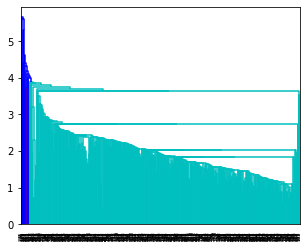

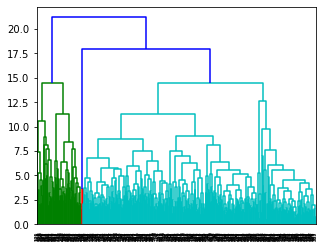

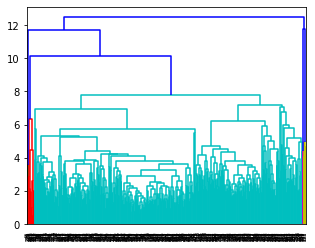

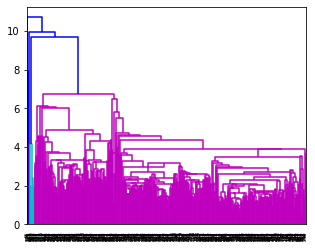

In [8]:
# with scipy library
Z = linkage(data_scaled, 'single')
fig = plt.figure(figsize=(5, 4))
dn = dendrogram(Z)

Z = linkage(data_scaled, 'complete')
fig = plt.figure(figsize=(5, 4))
dn = dendrogram(Z)

Z = linkage(data_scaled, 'average')
fig = plt.figure(figsize=(5, 4))
dn = dendrogram(Z)

Z = linkage(data_scaled, 'centroid')
fig = plt.figure(figsize=(5, 4))
dn = dendrogram(Z)

plt.show()

### Exercise 2 b)

<div class="alert alert-success">
<b>Question</b> 
    
* What is the optimal metric for this data and why?
</div>

The best metric for this data is 'complete'. It has a very good Calinski Harabasz Score. If you compare the metric with the other scores they are either very similar or slightly better or worse. Furthermore, in the plotted figures you can see, that for 'complete' that the clusters are more balanced.

## Exercise 3

In [9]:
# shuffle data set
np.random.shuffle(data_scaled)

# Hierarchical agglomerative clustering
# parameters
metrics = ["single", "complete", "average"]

# keep track of the metrics
silhouette_scores_dict = {} 
calinski_harabasz_scores_dict = {}
davies_bouldin_scores_dict = {}

# Perform k-means
for metric in metrics:
    agglo_clustering = AgglomerativeClustering(linkage=metric)
    agglo_clustering.fit(data_scaled)
    
    score_silhouette = silhouette_score(data_scaled, agglo_clustering.labels_)
    silhouette_scores_dict[metric]=score_silhouette
    #silhouette_scores.append(score_silhouette)
    
    score_calinski = calinski_harabasz_score(data_scaled, agglo_clustering.labels_)
    calinski_harabasz_scores_dict[metric]=score_calinski
    #calinski_harabasz_scores.append(score_calinski)
    
    score_davies = davies_bouldin_score(data_scaled, agglo_clustering.labels_)
    davies_bouldin_scores_dict[metric]=score_davies
    #davies_bouldin_scores.append(score_davies)
    
# Print scores
print("silhouette_scores: ", silhouette_scores_dict)
print("calinski_harabasz_scores: ", calinski_harabasz_scores_dict)
print("davies_bouldin_scores: ", davies_bouldin_scores_dict)

silhouette_scores:  {'single': 0.4439446759422951, 'complete': 0.3728884620458947, 'average': 0.4487263729077788}
calinski_harabasz_scores:  {'single': 8.926838505387817, 'complete': 200.63621230924883, 'average': 25.08409651528349}
davies_bouldin_scores:  {'single': 0.5991592223789288, 'complete': 1.137764488482201, 'average': 1.0006977248721711}


<div class="alert alert-success">
<b>Question</b> 
    
* What do you observe? 
* Can you make any conclusions how robust different linkage metrics are to data order?
</div>

I get the same scores with the shuffled data. That shows how robust the used libraries are to shuffled data. Linkage metrics are also therefore very likely to be very robust to shuffled data. However, in the lecture slides it says in L4 clustering on slide 36 that most linkage metrics are sensitive to data order besides single linkage. So that means that the explanation lays in the implementation of the library.

## Exercise 4

In [10]:
d = {'name': ['Clover', 'Sunny', 'Rose', 'Daisy', 'Strawberry', 'Molly'], 
     'race': ['Holstein', 'Ayrshire', 'Holstein', 'Ayrshire', 'Finncattle', 'Ayrshire'],
     'age': [2, 2, 5, 4, 7, 8],
     'daily_milk_yield': [20, 10, 15, 25, 35, 45],
     'character': ['lively', 'kind', 'calm', 'calm', 'calm', 'kind'],
     'music': ['rock', 'rock', 'country', 'classical', 'classical', 'country']}
df_cow = pd.DataFrame(data=d)
df_cow

,name,race,age,daily_milk_yield,character,music
0,Clover,Holstein,2,20,lively,rock
1,Sunny,Ayrshire,2,10,kind,rock
2,Rose,Holstein,5,15,calm,country
3,Daisy,Ayrshire,4,25,calm,classical
4,Strawberry,Finncattle,7,35,calm,classical
5,Molly,Ayrshire,8,45,kind,country


### Exercise 4 a)

In [11]:
# Scale numerical features
df_cow_scaled = df_cow.copy()
df_cow_scaled['age'] = zscore(df_cow_scaled['age'].values)
df_cow_scaled['daily_milk_yield'] = zscore(df_cow_scaled['daily_milk_yield'].values)
df_cow_scaled

,name,race,age,daily_milk_yield,character,music
0,Clover,Holstein,-1.166920,-0.420084,lively,rock
1,Sunny,Ayrshire,-1.166920,-1.260252,kind,rock
2,Rose,Holstein,0.145865,-0.840168,calm,country
3,Daisy,Ayrshire,-0.291730,0.000000,calm,classical
4,Strawberry,Finncattle,1.021055,0.840168,calm,classical
5,Molly,Ayrshire,1.458650,1.680336,kind,country


In [12]:
# Euclidean distance

# create 2D coordinates
x = df_cow_scaled['age'].values
y = df_cow_scaled['daily_milk_yield'].values

coords = []
for i in range(len(x)):
    coords.append((x[i],y[i]))

distance_matrix_euclidean = distance.cdist(coords, coords, 'euclidean')
#print(distance_matrix_euclidean)

similarity_matrix_euclidean = 1 / (1 + distance_matrix_euclidean)
print(similarity_matrix_euclidean)

[[1.         0.54342863 0.42045789 0.50741142 0.28369042 0.22923437]
 [0.54342863 1.         0.42045789 0.39458038 0.24795529 0.20234042]
 [0.42045789 0.42045789 1.         0.51353233 0.34547158 0.26028848]
 [0.50741142 0.39458038 0.51353233 1.         0.39083616 0.29185252]
 [0.28369042 0.24795529 0.34547158 0.39083616 1.         0.51353233]
 [0.22923437 0.20234042 0.26028848 0.29185252 0.51353233 1.        ]]


In [13]:
# Mahalanobis distance
distance_matrix_mahalanobis = distance.cdist(coords, coords, 'mahalanobis', VI=None)
# print(distance_matrix_mahalanobis)

similarity_matrix_mahalanobis = 1 / (1 + distance_matrix_mahalanobis)
print(similarity_matrix_mahalanobis)

[[1.         0.38981442 0.24136452 0.49017834 0.29505025 0.28331167]
 [0.38981442 1.         0.35467813 0.4412813  0.31889861 0.26164814]
 [0.24136452 0.35467813 1.         0.30274127 0.34200803 0.25734316]
 [0.49017834 0.4412813  0.30274127 1.         0.42279899 0.36918974]
 [0.29505025 0.31889861 0.34200803 0.42279899 1.         0.50969595]
 [0.28331167 0.26164814 0.25734316 0.36918974 0.50969595 1.        ]]


### Exercise 4 b)

In [14]:
# Goodall measure
race = np.unique(df_cow_scaled['race'])
character = np.unique(df_cow_scaled['character'])
music = np.unique(df_cow_scaled['music'])
print(race)
print(character)
print(music)

['Ayrshire' 'Finncattle' 'Holstein']
['calm' 'kind' 'lively']
['classical' 'country' 'rock']


In [15]:
# calculate frequency of values in column
frequency_race = df_cow_scaled['race'].value_counts().to_dict()
frequency_character = df_cow_scaled['character'].value_counts().to_dict()
frequency_music = df_cow_scaled['music'].value_counts().to_dict()

# probability values in respective column
prob_ayrshire = frequency_race['Ayrshire'] / df_cow_scaled['race'].count()
prob_finncattle = frequency_race['Finncattle'] / df_cow_scaled['race'].count()
prob_holstein =frequency_race['Holstein'] / df_cow_scaled['race'].count()

prob_calm = frequency_character['calm'] / df_cow_scaled['character'].count()
prob_kind = frequency_character['kind'] / df_cow_scaled['character'].count()
prob_lively = frequency_character['lively'] / df_cow_scaled['character'].count()

prob_classical = frequency_music['classical'] / df_cow_scaled['music'].count()
prob_country = frequency_music['country'] / df_cow_scaled['music'].count()
prob_rock = frequency_music['rock'] / df_cow_scaled['music'].count()

print(prob_ayrshire, prob_finncattle, prob_holstein, prob_calm, prob_kind, prob_lively, prob_classical, prob_country, prob_rock)


0.5 0.16666666666666666 0.3333333333333333 0.5 0.3333333333333333 0.16666666666666666 0.3333333333333333 0.3333333333333333 0.3333333333333333


In [16]:
features = ['race','character','music']

#similarity_graph = np.zeros((15,4)) # explanation dimension: (kombinatorik everyone with everyone n^k-1, keep track of values in 4 columns)
similarity_matrix_cat = np.zeros((df_cow_scaled.shape[0],df_cow_scaled.shape[0]))
counter = 0
overview = {}

for i in range(df_cow_scaled.shape[0]):
    for j in range(i+1,df_cow_scaled.shape[0]):
        #print('i: ',i,' j: ',j)
        
        number_overlapping_feature_values = 0
        shared_values = []
        sum_prob_shared_value = 0
        for feature in features:
            if (df_cow_scaled[feature][i] == df_cow_scaled[feature][j]):
                number_overlapping_feature_values += 1
                shared_values.append(df_cow_scaled[feature][i])
                
                if (df_cow_scaled[feature][i] == 'Ayrshire'):
                    sum_prob_shared_value += 1 - prob_ayrshire**2
                elif (df_cow_scaled[feature][i] == 'Finncattle'):
                    sum_prob_shared_value += 1 - prob_finncattle**2
                elif (df_cow_scaled[feature][i] == 'Holstein'):
                    sum_prob_shared_value += 1 - prob_holstein**2
                elif (df_cow_scaled[feature][i] == 'calm'):
                    sum_prob_shared_value += 1 - prob_calm**2
                elif (df_cow_scaled[feature][i] == 'kind'):
                    sum_prob_shared_value += 1 - prob_kind**2
                elif (df_cow_scaled[feature][i] == 'lively'):
                    sum_prob_shared_value += 1 - prob_lively**2
                elif (df_cow_scaled[feature][i] == 'classical'):
                    sum_prob_shared_value += 1 - prob_classical**2
                elif (df_cow_scaled[feature][i] == 'country'):
                    sum_prob_shared_value += 1 - prob_country**2
                elif (df_cow_scaled[feature][i] == 'rock'):
                    sum_prob_shared_value += 1 - prob_rock**2
        overlap = number_overlapping_feature_values / len(features)
        goodall = sum_prob_shared_value / len(features)
        
        # write information in similarity_graph
        #similarity_graph[counter][0] = str(""+str(i)+"-"+str(j)) # Spalte 1: Kombination
        #similarity_graph[counter][1] = shared_values # Spalte 2: shared values
        #similarity_graph[counter][2] = overlap # Spalte 3: overlap
        overview[(i,j)] = [shared_values, overlap, goodall]
        similarity_matrix_cat[i][j] = goodall
        similarity_matrix_cat[j][i] = goodall
         
        counter +=1
        

In [17]:
np.fill_diagonal(similarity_matrix_cat, 1)

print(similarity_matrix_cat)

[[1.        0.2962963 0.2962963 0.        0.        0.       ]
 [0.2962963 1.        0.        0.25      0.        0.5462963]
 [0.2962963 0.        1.        0.25      0.25      0.2962963]
 [0.        0.25      0.25      1.        0.5462963 0.25     ]
 [0.        0.        0.25      0.5462963 1.        0.       ]
 [0.        0.5462963 0.2962963 0.25      0.        1.       ]]


### Exercise 4 c)

In [18]:
# overlap similarity

lambda_mixed_data = 2/5 # see lecture slide: e.g. fraction of numerical features in data

mixed_similarity = lambda_mixed_data * similarity_matrix_mahalanobis  + (1 - lambda_mixed_data) * similarity_matrix_cat 
mixed_similarity

array([[1.        , 0.33370354, 0.27432359, 0.19607134, 0.1180201 ,
        0.11332467],
       [0.33370354, 1.        , 0.14187125, 0.32651252, 0.12755944,
        0.43243703],
       [0.27432359, 0.14187125, 1.        , 0.27109651, 0.28680321,
        0.28071504],
       [0.19607134, 0.32651252, 0.27109651, 1.        , 0.49689737,
        0.2976759 ],
       [0.1180201 , 0.12755944, 0.28680321, 0.49689737, 1.        ,
        0.20387838],
       [0.11332467, 0.43243703, 0.28071504, 0.2976759 , 0.20387838,
        1.        ]])

In [19]:
#mixed_similarity_normalized = (mixed_similarity - np.min(mixed_similarity)) / (np.max(mixed_similarity) - np.min(mixed_similarity))
#print(mixed_similarity_normalized)

### Exercise 4 d)

In [20]:
# transform from similarity to distance
mixed_distance = 1 - mixed_similarity
print(mixed_distance)

[[0.         0.66629646 0.72567641 0.80392866 0.8819799  0.88667533]
 [0.66629646 0.         0.85812875 0.67348748 0.87244056 0.56756297]
 [0.72567641 0.85812875 0.         0.72890349 0.71319679 0.71928496]
 [0.80392866 0.67348748 0.72890349 0.         0.50310263 0.7023241 ]
 [0.8819799  0.87244056 0.71319679 0.50310263 0.         0.79612162]
 [0.88667533 0.56756297 0.71928496 0.7023241  0.79612162 0.        ]]


<div class="alert alert-success">
<b>Question</b> 
    
* Is the distance measure a metric? Prove your answer.
</div>

To prove that the distance measure is a metric we need to prove the 4 properties:
- In the mixed distance matrix we can see that all distances are non-negative
- The distance is only 0 if x=y. That's the case since only the diagonal is zero
- The symmetry d(x,y) = d(y,x) also applies because when we transpose the matrix it is the same since we have a symmetric matrix.
- The triangle inequality also applies because we calculated the distances in the previous steps with the Euclidean distance. And the L2-norm contains that property.

## Exercise 5

In [21]:
dataset = np.array([[0, 1],
                  [-0.5, 1.5],
                  [1.5, 2.5],
                  [1, 3]])
dataset

array([[ 0. ,  1. ],
       [-0.5,  1.5],
       [ 1.5,  2.5],
       [ 1. ,  3. ]])

### Exercise 5 a)

In [22]:
# Data scaling
dataset_scaled = StandardScaler().fit_transform(dataset)

# calculate covariance matrix
features = dataset_scaled.T
cov_matrix = np.cov(features)
print("cov_matrix: ", cov_matrix)

# eigenvalue decomposition
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigenvectors: ', eig_vectors)
print('Eigenvalues: ', eig_values)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

cov_matrix:  [[1.33333333 1.06666667]
 [1.06666667 1.33333333]]
Eigenvectors:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalues:  [2.4        0.26666667]
Eigenvalues in descending order:
2.3999999999999995
0.2666666666666664


In [23]:
df_scaled = pd.DataFrame(dataset_scaled)
df_scaled

,0,1
0,-0.632456,-1.264911
1,-1.264911,-0.632456
2,1.264911,0.632456
3,0.632456,1.264911


### Exercise 5 b)

<div class="alert alert-danger">
<b>Task:</b> 

Use it to transform the original 2-dimensional data set into a 1-dimensional representation (a 4 × 1 matrix) such that the variance of the resulting data is equal to the largest eigenvalue.

</div>

In [24]:
pca_1comp = PCA(n_components=1)
principal_components1 = pca_1comp.fit_transform(dataset_scaled)
principal_df1 = pd.DataFrame(data = principal_components1, columns = ['pc1'])
principal_df1

,pc1
0,1.341641
1,1.341641
2,-1.341641
3,-1.341641


In [25]:
principal_df1.var()

pc1    2.4
dtype: float64

<div class="alert alert-danger">
<b>Task:</b> 

Next, use it to transform the original dataset into a 2-dimensional representation, such that the variance of one of the columns is equal to the smallest eigenvalue.
</div>

In [26]:
pca_2comp = PCA(n_components=2)
principal_components2 = pca_2comp.fit_transform(dataset_scaled)
principal_df2 = pd.DataFrame(data = principal_components2, columns = ['pc1','pc2'])
principal_df2

,pc1,pc2
0,1.341641,0.447214
1,1.341641,-0.447214
2,-1.341641,0.447214
3,-1.341641,-0.447214


In [27]:
principal_df2.var()

pc1    2.400000
pc2    0.266667
dtype: float64

### Exercise 5 c)

In [28]:
# Compute the Euclidean distance between all pairs of points in the original data set
dist_orig = distance.cdist(dataset,dataset, 'euclidean')
print("Euclidean distance matrix:")
dist_orig

Euclidean distance matrix:


array([[0.        , 0.70710678, 2.12132034, 2.23606798],
       [0.70710678, 0.        , 2.23606798, 2.12132034],
       [2.12132034, 2.23606798, 0.        , 0.70710678],
       [2.23606798, 2.12132034, 0.70710678, 0.        ]])

In [29]:
# Compute the Euclidean distance between all pairs of points in the 1-dimensional representation obtained in exercise 5b
data_pc1 = principal_df1['pc1'].values
coords = []
for i in range(len(data_pc1)):
    coords.append([data_pc1[i]])
print("coords: ", coords)

dist_pc1 = distance.pdist(coords, 'euclidean')
print("Euclidean distance matrix:")
dist_pc1


coords:  [[1.3416407864998747], [1.341640786499874], [-1.3416407864998738], [-1.341640786499874]]
Euclidean distance matrix:


array([6.66133815e-16, 2.68328157e+00, 2.68328157e+00, 2.68328157e+00,
       2.68328157e+00, 2.22044605e-16])

In [30]:
# Compute the Euclidean distance between all pairs of points in the 2-dimensional representation obtained in exercise 5b.

coords = []
for i in range(principal_df2.shape[0]):
    coords.append((principal_df2['pc1'][i],principal_df2['pc2'][i]))
print(coords)

dist_pc2 = distance.cdist(coords,coords, 'euclidean')
print("Euclidean distance matrix:")
dist_pc2

[(1.3416407864998747, 0.44721359549995815), (1.341640786499874, -0.4472135954999579), (-1.3416407864998738, 0.44721359549995804), (-1.341640786499874, -0.44721359549995787)]
Euclidean distance matrix:


array([[0.        , 0.89442719, 2.68328157, 2.82842712],
       [0.89442719, 0.        , 2.82842712, 2.68328157],
       [2.68328157, 2.82842712, 0.        , 0.89442719],
       [2.82842712, 2.68328157, 0.89442719, 0.        ]])

<div class="alert alert-success">
<b>Question</b> 
    
* What is the effect of the previous transformations on these distances?
</div>

* It is basically the idea of Principal component analysis
* we can reduce the distance with the lower dimension while still retaining the majority of information
* if we convert it back to the same dimensional space the we get the same distances

### Exercise 5 d)

In [31]:
dataset2 = np.array([[np.sqrt(0.5), np.sqrt(0.5)],
                  [np.sqrt(0.5), 2 * np.sqrt(0.5)],
                  [4 * np.sqrt(0.5), np.sqrt(0.5)],
                  [4 * np.sqrt(0.5), 2 * np.sqrt(0.5)]])
dataset2

array([[0.70710678, 0.70710678],
       [0.70710678, 1.41421356],
       [2.82842712, 0.70710678],
       [2.82842712, 1.41421356]])

In [32]:
dataset_scaled2 = StandardScaler().fit_transform(dataset2)
dataset_scaled2

array([[-1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1.,  1.]])

In [33]:
df_scaled2 = pd.DataFrame(dataset_scaled2)
df_scaled2

,0,1
0,-1.0,-1.0
1,-1.0,1.0
2,1.0,-1.0
3,1.0,1.0


In [34]:
# repeat a)

# calculate covariance matrix
features = dataset_scaled2.T
cov_matrix = np.cov(features)
print("cov_matrix: ", cov_matrix)

# eigenvalue decomposition
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigenvectors: ', eig_vectors)
print('Eigenvalues: ', eig_values)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

cov_matrix:  [[1.33333333 0.        ]
 [0.         1.33333333]]
Eigenvectors:  [[1. 0.]
 [0. 1.]]
Eigenvalues:  [1.33333333 1.33333333]
Eigenvalues in descending order:
1.3333333333333333
1.3333333333333333


In [35]:
# repeat b)

pca_1comp = PCA(n_components=1)
principal_components1 = pca_1comp.fit_transform(dataset_scaled2)
principal_df1 = pd.DataFrame(data = principal_components1, columns = ['pc1'])
principal_df1

,pc1
0,1.0
1,1.0
2,-1.0
3,-1.0


In [36]:
principal_df1.var()

pc1    1.333333
dtype: float64

In [37]:
pca_2comp = PCA(n_components=2)
principal_components2 = pca_2comp.fit_transform(dataset_scaled2)
principal_df2 = pd.DataFrame(data = principal_components2, columns = ['pc1','pc2'])
principal_df2

,pc1,pc2
0,1.0,1.0
1,1.0,-1.0
2,-1.0,1.0
3,-1.0,-1.0


In [38]:
principal_df2.var()

pc1    1.333333
pc2    1.333333
dtype: float64

<div class="alert alert-success">
<b>Question</b> 
    
* What are the similarities and differences between the results on this data set and the first one? 
* Can you give a geometric explanation for the similarities? Hint: plot the two data sets.
</div>

<b>Answer:</b> 

* The standard scaled version of the dataset given in exercise 5 d) is the same as the 2D principal components.
* in d) both principal components have the same variance
* Basically they are the same rectangle which we can see below. Just scaled and rotated.

plot dataset 2


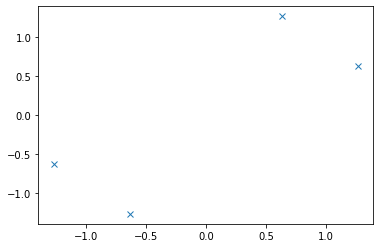

In [39]:
print("plot dataset 2")
plt.plot(df_scaled[0].values,df_scaled[1].values, 'x')

plot dataset 2


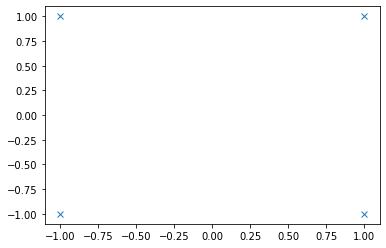

In [40]:
print("plot dataset 2")
plt.plot(df_scaled2[0].values,df_scaled2[1].values, 'x')